# Assignment 03: Data Clustering and Probability Analytics

## Introduction and Overview

In this assignment we will use a variety of data clustering and probability analytics on data related to economic prosperity. The data comes from [Human Progress](https://humanprogress.org/dws), a project by the [Cato Institute](https://www.cato.org/) that explains how much the world has progressed through comprehensive datasets. The data clustering and probability analytical codes can be found [here](https://github.com/bsharvey/EMSEDataAnalytics/blob/master/EMSE6992_Assignments/HW3.ipynb).

### Part 1: Import and Clean Data

In [6]:
#Import required libraries

import pandas as pd
from pandas import DataFrame as df

#Read in and combine GDP-related data files

GDP = df(pd.read_csv("GDP Datasets\GDP, 2011 International Dollars, PPP, 1990-2016.csv"))
GDP_PP = df(pd.read_csv("GDP Datasets\GDP Per Person, 2011 Internal Dollars, PPP, 1990-2016.csv"))
GDP_AG = df(pd.read_csv("GDP Datasets\GDP, Annual Growth Rate, Percent, 1961-2016.csv"))

GDP_Total = df(pd.merge(GDP_PP, GDP_AG, how='inner', on=['Country', 'Year']))
GDP_Total = df(pd.merge(GDP_Total, GDP, how='inner', on=['Country', 'Year']))
print(GDP_Total.head())

#Read in factors data files

Table01 = df(pd.read_csv("Factors Datasets\Democracy vs Autocracy Over Time.csv"))
Table02 = df(pd.read_csv("Factors Datasets\Doing Business, Enforcing Contracts, Overall Score.csv"))
Table03 = df(pd.read_csv("Factors Datasets\Economic Freedom, Access to Sound Money.csv"))
Table04 = df(pd.read_csv("Factors Datasets\Economic Freedom, Freedom to Trade Internationally.csv"))
Table05 = df(pd.read_csv("Factors Datasets\Economic Freedom, Legal Structure and Security of Property Rights.csv"))
Table06 = df(pd.read_csv("Factors Datasets\Economic Freedom, Regulation of Credit, Labor, and Business.csv"))
Table07 = df(pd.read_csv("Factors Datasets\Economic Freedom, Scale 0 - 10.csv"))
Table08 = df(pd.read_csv("Factors Datasets\Economic Freedom, Size of Government.csv"))
Table09 = df(pd.read_csv("Factors Datasets\Effect of Taxation on Incentives to Invest.csv"))
Table10 = df(pd.read_csv("Factors Datasets\Start a Business Days.csv"))
Table11 = df(pd.read_csv("Factors Datasets\Start a Business Procedures.csv"))
Table12 = df(pd.read_csv("Factors Datasets\Prevalence of Trade Barriers.csv"))
Table13 = df(pd.read_csv("Factors Datasets\Total Tax Rate.csv"))
Table14 = df(pd.read_csv("Factors Datasets\Trade Tariffs.csv"))

       Country  Year  GDP Per Person  GDP Annual Growth Rate           GDP
0  Afghanistan  2003     1099.194507                8.444163  2.535276e+10
1  Afghanistan  2004     1062.249360                1.055556  2.562037e+10
2  Afghanistan  2005     1136.123214               11.175270  2.848352e+10
3  Afghanistan  2006     1161.124889                5.554138  3.006553e+10
4  Afghanistan  2007     1284.775213               13.740205  3.419659e+10


Note that the Democracy vs Autocracy Over Time dataset goes back to 1800, but all other datasets go back to 1970s at the earliest. This means that for years 1800 - 1970, all columns (besides Democracy vs Autocracy score) will have 'NaN' entries, which provide no information and will complicate our data analysis code. Therefore, we will use a subset of the Democracy vs Autocracy Over Time dataset that goes back to 1970s.

In [13]:
Table01 = Table01[Table01["Year"] > 1970]
Table01.head()

,Country,Year,Democracy vs Autocracy Score
171,Afghanistan,1971,-7
172,Afghanistan,1972,-7
173,Afghanistan,1973,-7
174,Afghanistan,1974,-7
175,Afghanistan,1975,-7


In [14]:
#Combine factors datasets

def MergeTables():
    tables = (Table02, Table03, Table04, Table05, Table06, Table07, Table08, Table09, Table10, Table11, Table12, Table13, Table14)
    Factors = Table01
    for i in range(12):
            Factors = df(pd.merge(Factors, tables[i], how='inner', on=['Country', 'Year']))
    Factors = df(Factors)
    return Factors
#Factors = df(MergeTables())
Factors.head(10)

,Country,Year,Democracy vs Autocracy Score,Enforcing Contracts Overall Score,Access to Sound Money Score,Freedom to Trade Internationally Score,Legal Structure and Security of Property Rights Score,"Regulation of Credit, Labor, and Business Score",Economic Freedom Score,Size of Government Score,Effect of Taxation on Incentives to Invest,Number of Days to Start a Business_x,Number of Days to Start a Business_y,Prevalence of Trade Barriers Score,Total Tax Rate
0,Albania,2013,9,58.89,9.69,7.71,4.54,6.62,7.27,7.80,3.736204,4.0,4.0,4.068446,38.7
1,Albania,2014,9,56.84,9.63,8.23,4.67,6.95,7.48,7.90,3.557951,4.5,5.0,3.674663,31.7
2,Albania,2015,9,53.66,9.59,8.11,5.00,7.04,7.53,7.92,3.203822,4.5,5.0,3.816012,30.7
3,Albania,2016,9,53.66,9.55,8.21,5.07,6.91,7.54,7.94,2.759165,5.5,6.0,4.263414,36.5
4,Algeria,2013,2,52.89,7.17,4.90,4.34,5.41,5.04,3.40,3.643963,25.0,14.0,3.430355,72.0
5,Algeria,2014,2,52.89,7.20,4.66,4.35,5.38,5.01,3.46,3.540837,25.0,14.0,3.706969,71.9
6,Algeria,2015,2,55.49,6.85,4.01,4.55,5.26,4.83,3.48,3.357684,22.0,13.0,3.541834,72.7
7,Algeria,2016,2,55.49,7.25,4.13,4.69,5.27,4.99,3.62,3.352651,20.0,12.0,3.572433,72.7
8,Angola,2013,-2,25.22,6.73,5.95,2.99,5.31,5.25,5.27,3.942857,68.0,8.0,3.735294,53.2
9,Angola,2014,-2,25.22,6.79,5.11,2.99,5.36,5.13,5.40,3.527077,66.0,8.0,2.879643,52.1


In [15]:
#Combine GDP and Factors datasets

Dataset = df(pd.merge(GDP_Total, Factors, how='inner', on=['Country', 'Year']))
Dataset.head()

,Country,Year,GDP Per Person,GDP Annual Growth Rate,GDP,Democracy vs Autocracy Score,Enforcing Contracts Overall Score,Access to Sound Money Score,Freedom to Trade Internationally Score,Legal Structure and Security of Property Rights Score,"Regulation of Credit, Labor, and Business Score",Economic Freedom Score,Size of Government Score,Effect of Taxation on Incentives to Invest,Number of Days to Start a Business_x,Number of Days to Start a Business_y,Prevalence of Trade Barriers Score,Total Tax Rate
0,Albania,2013,10504.09309,1.110000,3.041032e+10,9,58.89,9.69,7.71,4.54,6.62,7.27,7.80,3.736204,4.0,4.0,4.068446,38.7
1,Albania,2014,10715.32958,1.800000,3.095770e+10,9,56.84,9.63,8.23,4.67,6.95,7.48,7.90,3.557951,4.5,5.0,3.674663,31.7
2,Albania,2015,11024.91511,2.590000,3.175951e+10,9,53.66,9.59,8.11,5.00,7.04,7.53,7.92,3.203822,4.5,5.0,3.816012,30.7
3,Albania,2016,11424.62832,3.460000,3.285838e+10,9,53.66,9.55,8.21,5.07,6.91,7.54,7.94,2.759165,5.5,6.0,4.263414,36.5
4,Algeria,2013,13253.21751,2.767639,5.081090e+11,2,52.89,7.17,4.90,4.34,5.41,5.04,3.40,3.643963,25.0,14.0,3.430355,72.0


Note that some rows have NaN values in many columns. As with the Democracy vs Autocracy dataset, these rows will provide little to no information during our analysis and will complicate our data analysis code. Therefore, we will drop rows that have NaN in six or more columns, since we have 13 factors not including columns related to GDP.

In [46]:
Dataset = df(Dataset.dropna(thresh=6))
Dataset.tail(10)

,Country,Year,GDP Per Person,GDP Annual Growth Rate,GDP,Democracy vs Autocracy Score,Enforcing Contracts Overall Score,Access to Sound Money Score,Freedom to Trade Internationally Score,Legal Structure and Security of Property Rights Score,"Regulation of Credit, Labor, and Business Score",Economic Freedom Score,Size of Government Score,Effect of Taxation on Incentives to Invest,Number of Days to Start a Business_x,Number of Days to Start a Business_y,Prevalence of Trade Barriers Score,Total Tax Rate
517,Yemen,2014,3766.806001,-0.188690,9.886482e+10,0,60.13,8.74,7.01,4.44,5.22,6.74,8.29,3.195265,40.0,6.0,3.823869,32.7
518,Yemen,2016,2325.069960,-9.779168,6.413523e+10,0,48.52,9.04,6.68,3.13,5.23,6.34,7.63,3.082047,40.0,6.0,3.664051,33.1
519,Zambia,2013,3576.680691,5.059376,5.419819e+10,7,57.53,8.77,7.44,5.51,6.58,6.95,6.43,3.846249,17.0,6.0,4.341300,15.2
520,Zambia,2014,3632.503753,4.695826,5.674325e+10,7,57.53,8.98,7.40,5.68,6.69,6.99,6.21,3.877473,6.5,5.0,4.476551,15.1
521,Zambia,2015,3627.202041,2.919881,5.840008e+10,7,49.89,8.72,6.86,5.57,6.41,6.74,6.16,3.502198,6.5,5.0,4.781884,14.8
522,Zambia,2016,3636.059711,3.300000,6.032728e+10,6,49.89,8.26,6.97,5.33,6.41,6.61,6.06,3.379145,7.5,6.0,4.515184,18.6
523,Zimbabwe,2013,1901.183463,5.270355,2.862138e+10,4,41.03,6.90,5.59,3.58,3.84,5.30,6.62,3.611909,90.0,9.0,4.839155,35.8
524,Zimbabwe,2014,1908.477594,2.765271,2.941284e+10,4,43.25,7.97,5.91,3.62,3.94,5.63,6.74,3.529561,90.0,9.0,4.890493,35.3
525,Zimbabwe,2015,1890.777897,1.423933,2.983166e+10,4,38.73,8.18,5.68,3.82,5.45,6.01,6.90,3.153250,90.0,9.0,4.539993,32.8
526,Zimbabwe,2016,1859.937441,0.693918,3.003866e+10,4,38.73,8.30,5.56,3.75,6.55,6.06,6.15,2.997059,90.0,9.0,4.379714,32.8


### Part 2: Data Clustering and Predictive Analytics

#### 1: Decision Trees

Code: [Decision Trees - Iris Dataset](https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/tree/plot_iris.ipynb)

Decision trees in machine learning are used to predict an item's target value and/or classification based on obervations about the item. We can also use regression trees, which are decisions trees where the target variable is a continuous value. [1]

For simplicity's sake, we'll stick with decision trees. Since our target values (GDP, GDP Per Person, and GDP Annual Growth Rate) are all continuous values, we need to create a categorical target value. For this dataset, we will use The World Bank's analytical classification based on Gross National Income (GNI)(2).


(1): [Decision tree learning](https://en.wikipedia.org/wiki/Decision_tree_learning)

(2): [New country classifications by income level: 2016-2017](https://blogs.worldbank.org/opendata/new-country-classifications-2016)

Automatically created module for IPython interactive environment


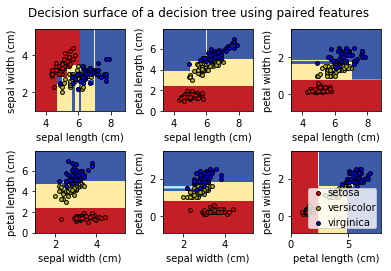

In [65]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

#### 2: Semi Supervised Classification - Iris Dataset

Code: [Decision boundary of label propagation versus SVM on the Iris dataset](https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/semi_supervised/plot_label_propagation_versus_svm_iris.ipynb)

Automatically created module for IPython interactive environment


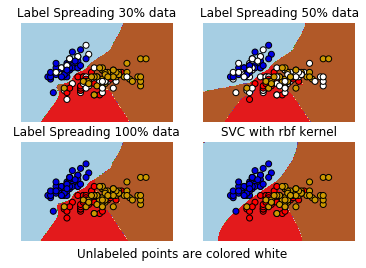

In [63]:
print(__doc__)

# Authors: Clay Woolam <clay@woolam.org>
# License: BSD

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import label_propagation

rng = np.random.RandomState(0)

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

# step size in the mesh
h = .02

y_30 = np.copy(y)
y_30[rng.rand(len(y)) < 0.3] = -1
y_50 = np.copy(y)
y_50[rng.rand(len(y)) < 0.5] = -1
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (label_propagation.LabelSpreading().fit(X, y_30),
        y_30)
ls50 = (label_propagation.LabelSpreading().fit(X, y_50),
        y_50)
ls100 = (label_propagation.LabelSpreading().fit(X, y), y)
rbf_svc = (svm.SVC(kernel='rbf').fit(X, y), y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['Label Spreading 30% data',
          'Label Spreading 50% data',
          'Label Spreading 100% data',
          'SVC with rbf kernel']

color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}

for i, (clf, y_train) in enumerate((ls30, ls50, ls100, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')

    plt.title(titles[i])

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

#### 3: Support Vector Machines - Part 2 - Iris Dataset

Code: [Plot different SVM classifiers in the iris dataset](https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/svm/plot_iris.ipynb)

Automatically created module for IPython interactive environment


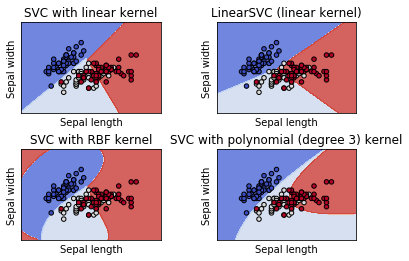

In [64]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

#### 4: Nearest Neighbors

Code: [Nearest Neighbors Classification](https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/neighbors/plot_classification.ipynb)

Automatically created module for IPython interactive environment


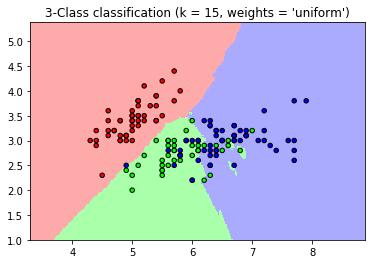

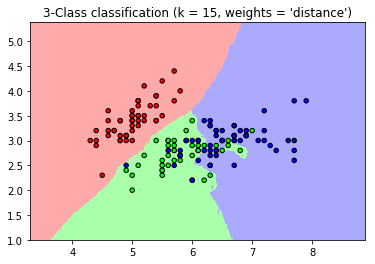

In [66]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

#### 5: Generalized Linear Models - Iris Dataset

Code: [Logistic Regression 3-class Classifier](https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/linear_model/plot_iris_logistic.ipynb)

Automatically created module for IPython interactive environment


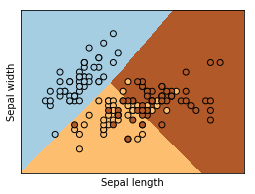

In [67]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

#### 6: Gaussian Process for Machine Learning - Iris Dataset

Code: [Gaussian process classification (GPC) on iris dataset](https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/gaussian_process/plot_gpc_iris.ipynb)

Automatically created module for IPython interactive environment


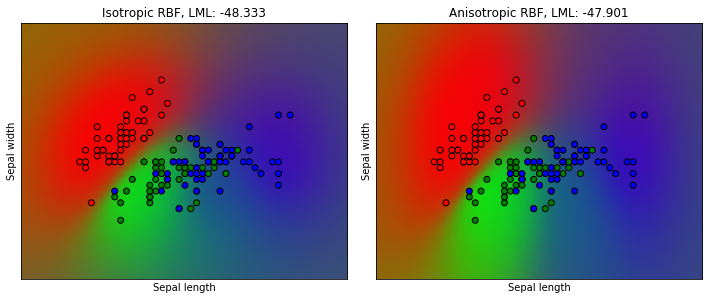

In [68]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = np.array(iris.target, dtype=int)

h = .02  # step size in the mesh

kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(10, 5))
for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    # Plot the predicted probabilities. For that, we will assign a color to
    # each point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(1, 2, i + 1)

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y],
                edgecolors=(0, 0, 0))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title("%s, LML: %.3f" %
              (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta)))

plt.tight_layout()
plt.show()

#### 7: Clustering

Code: [K-means Clustering](https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/cluster/plot_cluster_iris.ipynb)

Automatically created module for IPython interactive environment


C:\Users\Envee\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


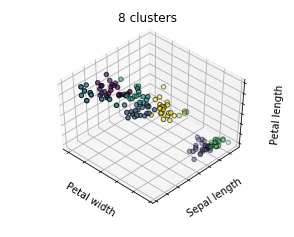

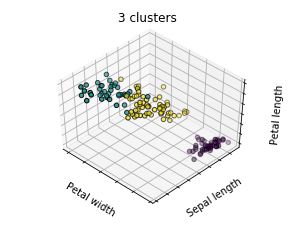

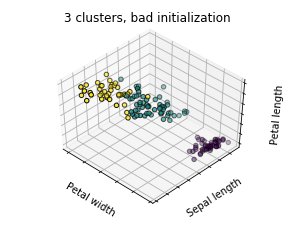

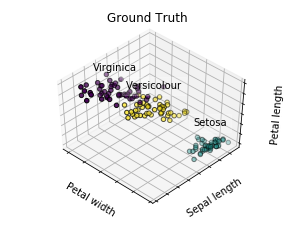

In [69]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

#### 8: Applications - Boston Housing Dataset (with GDP/Factors Dataset)

Automatically created module for IPython interactive environment


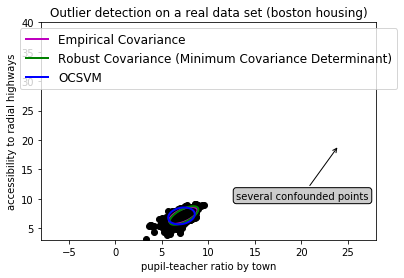

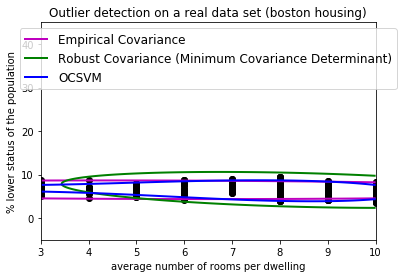

In [71]:
print(__doc__)

# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause

import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_boston

# Get data
X1 = Dataset.iloc[:, [8, 10]]  # two clusters
X2 = Dataset.iloc[:, [5, 12]]  # "banana"-shaped

# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.,
                                             contamination=0.261),
    "Robust Covariance (Minimum Covariance Determinant)":
    EllipticEnvelope(contamination=0.261),
    "OCSVM": OneClassSVM(nu=0.261, gamma=0.05)}
colors = ['m', 'g', 'b']
legend1 = {}
legend2 = {}

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(-8, 28, 500), np.linspace(3, 40, 500))
xx2, yy2 = np.meshgrid(np.linspace(3, 10, 500), np.linspace(-5, 45, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])
    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on a real data set (boston housing)")
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate("several confounded points", xy=(24, 19),
             xycoords="data", textcoords="data",
             xytext=(13, 10), bbox=bbox_args, arrowprops=arrow_args)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("accessibility to radial highways")
plt.xlabel("pupil-teacher ratio by town")

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())

plt.figure(2)  # "banana" shape
plt.title("Outlier detection on a real data set (boston housing)")
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], color='black')
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend((legend2_values_list[0].collections[0],
            legend2_values_list[1].collections[0],
            legend2_values_list[2].collections[0]),
           (legend2_keys_list[0], legend2_keys_list[1], legend2_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("% lower status of the population")
plt.xlabel("average number of rooms per dwelling")

plt.show()

#### 9: Classification Comparison and Probability

Code: [Linear and Quadratic Discriminant Analysis with covariance ellipsoid](https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/classification/plot_lda_qda.ipynb)

Automatically created module for IPython interactive environment


C:\Users\Envee\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:664: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  DeprecationWarning)
C:\Users\Envee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function covariances_ is deprecated; Attribute covariances_ was deprecated in version 0.19 and will be removed in 0.21. Use covariance_ instead
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Envee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function covariances_ is deprecated; Attribute covariances_ was deprecated in version 0.19 and will be removed in 0.21. Use covariance_ instead
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Envee\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:664: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  

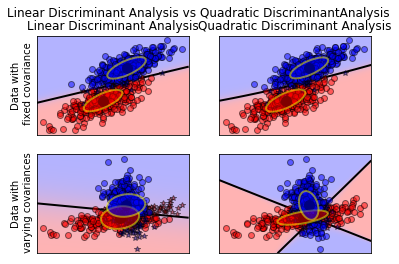

In [72]:
print(__doc__)

from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    alpha = 0.5

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red', markeredgecolor='k')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='#990000', markeredgecolor='k')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
             color='blue', markeredgecolor='k')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='#000099', markeredgecolor='k')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10, markeredgecolor='k')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10, markeredgecolor='k')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='yellow',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariances_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariances_[1], 'blue')

for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariances=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant'
             'Analysis')
plt.show()

#### 2: Preprocessing - Feature Scaling

Code: [Preprocessing - Wine Dataset](https://github.com/bsharvey/EMSEDataAnalytics/blob/master/auto_examples_jupyter/preprocessing/plot_scaling_importance.ipynb)

In [29]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
print(__doc__)

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features, target = Dataset[:, Dataset.columns != 'GDP Per Person'], Dataset['GDP Per Person']
#df.loc[:, df.columns != col]

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Show first principal componenets
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

# Scale and use PCA on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train == l, 0], X_train[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

Automatically created module for IPython interactive environment


TypeError: unhashable type: 'slice'